In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
from numpy import e, log, dot

In [ ]:
def load_planar_dataset():
  np.random.seed(1)
  m = 400
  N = int(m/2)
  D = 2
  X = np.zeros((m,D))
  Y = np.zeros((m,1), dtype = 'uint8')
  a = 4
  for j in range(2):
    ix = range(N*j, N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N)+np.random.randn(N)*0.2
    r = a*np.sin(4*t) + np.random.rand(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r * np.cos(t)]
    Y[ix] = j
  X = X.T
  Y = Y.T
  return X, Y

(2, 400)
(1, 400)


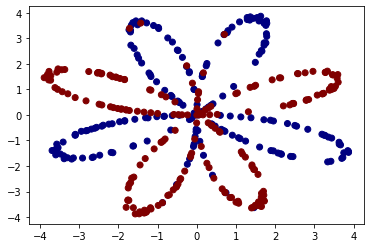

In [ ]:
X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

plt.scatter(X[0,:], X[1,:],c = Y, cmap='jet')

In [ ]:
# print(X)

In [ ]:
# print(Y)

In [ ]:
def sigmoid(x):
  return 1/(1+e**(-x))

def cost(y,y_hat):
  logprobs = -(1/m)*np.sum((np.multiply(y,log(y_hat))+np.multiply((1-y),log(1-y_hat))))
  return logprobs

In [ ]:
lr = 0.1
output_dim = len(Y.T)
n0, m = X.shape
n1 = 10
W1 = np.random.random((n1,n0))
b1 = np.zeros((n1,1))
n2 = 1
W2 = np.random.random((n2,n1))
b2 = np.zeros((n2, 1))
noEpoches = 20000

In [ ]:
Cost= []
for i in range(noEpoches):
  
  Z1 = dot(W1,X)+b1
  A1 = sigmoid(Z1)
  Z2 = dot(W2,A1)+b2
  A2 = sigmoid(Z2)
  dZ2 = A2-Y
  Cost.append(np.squeeze(cost(Y, A2)))
  dW2 = dot(dZ2,A1.T)/m
  db2 = np.sum(dZ2, axis = 1, keepdims = True)
  dZ1 = np.multiply(dot(W2.T,dZ2),(A1*(1-A1)))
  dW1 = dot(dZ1,X.T)/m
  db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims=True)
  W1 = W1 -lr*dW1
  W2 = W2 -lr*dW2
  b1 = b1 -lr*db1
  b2 = b2 - lr*db2

In [ ]:
def prediction(X, W1, b1, W2, b2):
  Z1 = dot(W1,X)+b1
  A1 = sigmoid(Z1)
  Z2 = dot(W2,A1)+b2
  A2 = sigmoid(Z2)
  predictions = np.round(A2)
  return predictions

In [ ]:
# prediction(X, W1, b1, W2, b2)

(118, 118)


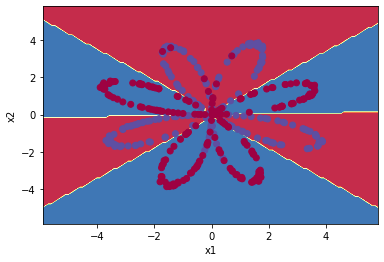

In [ ]:
x_min, x_max = X[0, :].min()-2, X[0,:].max()+2
y_min, y_max = X[1, :].min()-2, X[1,:].max()+2
h = 0.1
# print(X)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xn = (np.c_[xx.ravel(), yy.ravel()]).T
P = prediction(Xn, W1, b1, W2, b2)
P = P.reshape(xx.shape)
print(P.shape)
t = [10 if Y[0][i] == 0 else 1 for i in range(np.shape(Y)[1])]
plt.contourf(xx, yy, P, cmap = plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[0,:], X[1,:], c = t, cmap = plt.cm.Spectral)